In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import xesmf as xe
from sklearn_som.som import SOM

In [16]:
wind = xr.open_dataset('data/nwp_vorticity_197901_202508.nc')
ssta = xr.open_dataset('data/nwp_ssta_197901_202508.nc')

In [17]:
wind = wind.drop_vars(['latitude', 'longitude'])
ssta = ssta.rename(
    {
        'longitude': 'lon',
        'latitude': 'lat',
    }
)

In [18]:
wind_regrid = xr.Dataset(
    {
        'lat': (['lat'], ssta.lat.data, {'units': 'degrees_north'}),
        'lon': (['lon'], ssta.lon.data, {'units': 'degrees_east'}),
    }
)
wind_regrid

<xarray.Dataset> Size: 520B
Dimensions:  (lat: 50, lon: 80)
Coordinates:
  * lat      (lat) float32 200B 49.5 48.5 47.5 46.5 45.5 ... 4.5 3.5 2.5 1.5 0.5
  * lon      (lon) float32 320B 100.5 101.5 102.5 103.5 ... 177.5 178.5 179.5
Data variables:
    *empty*

In [19]:
regridder = xe.Regridder(wind, wind_regrid, 'conservative')
regridder

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_21x33_50x80.nc 
Reuse pre-computed weights? False 
Input grid shape:           (21, 33) 
Output grid shape:          (50, 80) 
Periodic in longitude?      False

In [22]:
uwind_regrid = regridder(wind.uwind, keep_attrs=True)
vwind_regrid = regridder(wind.vwind, keep_attrs=True)
vort_regrid = regridder(wind.vorticity, keep_attrs=True)

/home/hyunwoo/miniforge3/envs/ocean-research/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/hyunwoo/miniforge3/envs/ocean-research/lib/python3.11/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


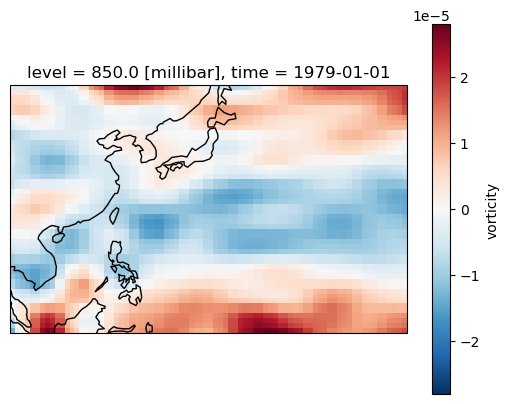

In [24]:
ax = plt.axes(projection=ccrs.PlateCarree())
vort_regrid.isel(time=0).plot.pcolormesh(ax=ax)
ax.coastlines()

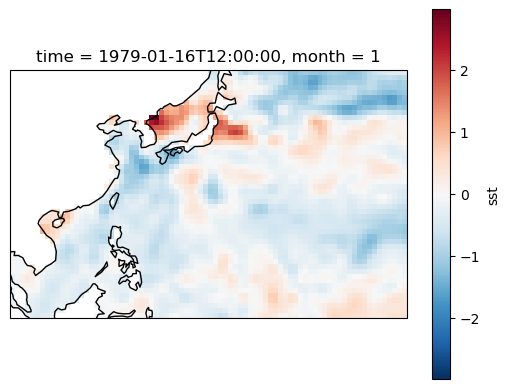

In [27]:
ax = plt.axes(projection=ccrs.PlateCarree())
ssta.sst.isel(time=0).plot.pcolormesh(ax=ax)
ax.coastlines()